# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Salefi Laoli]
- **Email:** [laolisalefi@gmail.com]
- **ID Dicoding:** [salefi_laoli]

## Menentukan Pertanyaan Bisnis

- Apakah terdapat peningkatan atau penurunan penggunaan sepeda dari tahun ke tahun?
- Apakah ada pengaruh musim tertentu dengan jumlah penyewaaan sepeda pada hari libur?
-Bagaimana hubungan antara variabel temp, atemp, dan humidity dengan jumlah peminjaman sepeda? Apakah ada korelasi antara variabel-variabel ini dengan jumlah peminjaman?


## Import Semua Packages/Library yang Digunakan

import semua library yang dibutuhkan.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [100]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


kode diatas, menampilkan 5 data teratas dari DataFrame day.teks tebal


In [101]:
hour = pd.read_csv("hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


kode diatas, menampilkan 5 data teratas dari DataFrame hour.



### Assessing Data

kita memeriksa tipe data data dari tiap kolom yang terdapat dalam dataframe day.


**Menilai data day**





Memeriksa tipe data dari setiap kolom

In [102]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari tabel diatas, dapat dilihat bahwa ada satu tipe data yang beda dan tidak sesuai pada kolom. tipe data yang harus diperbaiki adalah di kolom dteday.


berikut kode untuk memastikan adanya missing values atau tidak

In [103]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hasil diatas menunjukkan bahwa tidak terdapat value missing dalam DataFrame day.

Memeriksa duplikasi data

In [104]:
print("Jumlah duplikasi: ", day.duplicated().sum())


Jumlah duplikasi:  0


dapat dilihat tidak ditemukan duplikasi data pada DataFrame tersebut.

Memeriksa parameter statistik dari kolom numerik yang  terdapat dalam DataFrame day.

In [105]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak  ada keanehan atau masalah sejauh ini pada nilai statistik pada setiap DataFrame tersebut.

**Menilai data hour**

Selanjutnya peniaian terhadap data pada hour, dengan memeriksa tipe data dari tiap kolom.

In [106]:
hour.info

<bound method DataFrame.info of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]>

Dari tabel diatas, dapat dilihat bahwa ada satu tipe data yang beda dan tidak sesuai pada kolom. tipe data yang harus diperbaiki adalah di kolom dteday.

rikut kode untuk memastikan adanya missing values atau tidak


In [107]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

sejauh ini masih aman dan tidak ada missing values.

Pengecekan duplikat data


In [108]:

print("Jumlah duplikasi data: ", hour.duplicated().sum())

Jumlah duplikasi data:  0


Tidak ada duplikat data yang ditemukan.

Memeriksa parameter statistik dari kolom numerik yang  terdapat dalam DataFrame hour.

In [109]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Aman. Tidak ada masalah dan keanehan yang terjadi.

### Cleaning Data

Tahap terakhir dalam data wragling yaitu cleaning data. Hal ini dilakukan untuk membersihkan masalah yang teridentifikasi dalam proses sebelumnya yaitu proses assesing data.

**Membersihkan data day**

Menghapus tabel yang tidak perlu

In [110]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [111]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Menghapus tabel yang tidak perlu



menghapus beberapa tabel yang tidak perlu, dalam hal ini adalah tabel **hour**.


In [112]:

del hour

tabel hour sudah terhapus, sekarng menghapus kolom yang tidak perlu


In [113]:
 #Mengubah nama judul kolom
day.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [114]:
drop_col = ['instant']

for i in day.columns:
  if i in drop_col:
    day.drop(labels=i, axis=1, inplace=True)

day.head()



,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


dilihat dari hasilnya kolom instant
sudah terhapus.

Mengubah data angka menjadi keterangan untuk memperjelas data.

In [115]:
day['month'] = day['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day['season'] = day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day['weekday'] = day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day['weather_cond'] = day['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

merubah beberapa tipe data ke categorical

In [116]:
day['season'] = day.season.astype('category')
day['year'] = day.year.astype('category')
day['month'] = day.month.astype('category')
day['holiday'] = day.holiday.astype('category')
day['weekday'] = day.weekday.astype('category')
day['workingday'] = day.workingday.astype('category')
day['weather_cond'] = day.weather_cond.astype('category')



In [117]:
day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


mengubah angka menjadi keterangan agar lebih  mudah terbaca. sperti angka untuk season, weekday dan weather.

In [118]:

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   dateday       731 non-null    object  
 1   season        731 non-null    category
 2   year          731 non-null    category
 3   month         731 non-null    category
 4   holiday       731 non-null    category
 5   weekday       731 non-null    category
 6   workingday    731 non-null    category
 7   weather_cond  731 non-null    category
 8   temp          731 non-null    float64 
 9   atemp         731 non-null    float64 
 10  hum           731 non-null    float64 
 11  windspeed     731 non-null    float64 
 12  casual        731 non-null    int64   
 13  registered    731 non-null    int64   
 14  count         731 non-null    int64   
dtypes: category(7), float64(4), int64(3), object(1)
memory usage: 52.2+ KB


Mengubah tipe data ke datetime

In [119]:

day['dateday'] = pd.to_datetime(day.dateday)


In [120]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  windspeed     731 non-null    float64       
 12  casual        731 non-null    int64         
 13  registered    731 non-null    int64         
 14  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float

hasil tersebut menunjukkan bahwa tipe data dateday berubah menjadi daterime.

## Exploratory Data Analysis (EDA)

### Explore ...

**Eksplorasi data day**






hal pertama yang kita pastikan adalah parameter statistik dari DataFrame day.

In [121]:
day.describe(include="all")

<ipython-input-121-0f75e45f5a45>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day.describe(include="all")


,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
count,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,1.0,Aug,0.0,Mon,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


berdasarkan rangkuman diatas dapat dilihat infromasi peminjaman sepeda dari tahun 2011-2012.

Demografi/pengelompokkan penyewaan sepeda berdasarkan tahun

In [122]:
day.groupby(by='year').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                  
             mean         mean   max  min         mean
year                                                  
0      677.402740  2728.358904  6043  431  3405.761644
1     1018.483607  4581.450820  8714   22  5599.934426

dari hasil diatas, dapat dilihat bahwa penggunaan sepeda paling banyak terjadi di tahun terakhir. Kesimpulannya adalah penggunaan sepeda mengalami peningkatan dari tahun ke tahun

selanjutnya pengelompokkan penyewaan sepeda berdasarkan cuaca untuk melihat pengaruh cuaca terhadap penyewaan sepeda.

In [123]:
day.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Hasil diatas, menunjukkan bahwa penyewaan sepeda lebih banyak dilakukn di cuaca yang cerah


selanjutnya, untuk melihat korelasi antara pengaruh suhu, kelembapan udara dan kecepatan angin. kita akan mengelompokkan penyewaaan yang dilakukan seperti kode dibawah ini.

In [124]:
day.groupby(by=['temp', 'hum', 'windspeed']).agg({
    'count': ['max', 'min', 'mean', 'sum']
})


count                    
                              max   min    mean   sum
temp     hum      windspeed                          
0.059130 0.400000 0.171970    981   981   981.0   981
0.096522 0.436522 0.246600    986   986   986.0   986
0.097391 0.491739 0.158330   1416  1416  1416.0  1416
0.107500 0.414583 0.184700   2368  2368  2368.0  2368
0.127500 0.464583 0.409212   1529  1529  1529.0  1529
...                           ...   ...     ...   ...
0.834167 0.488750 0.165417   5463  5463  5463.0  5463
0.838333 0.542500 0.174138   3846  3846  3846.0  3846
0.848333 0.580417 0.133100   3387  3387  3387.0  3387
0.849167 0.500000 0.131221   3285  3285  3285.0  3285
0.861667 0.492083 0.163554   4840  4840  4840.0  4840

[731 rows x 4 columns]

berdasarkan data diatas dapat disimpulkan bahwa suhu, kelembaban udara dan kecepatan angin memengaruhi banyak orang yang meminjam sepeda. dari data diatas dapat dilihat bahwa saat suhu panas, orang cenderung lebih banyak melakukan peminjaman sepeda,

Untuk melihat peminjaman sepeda yang dilakukan pada bulan terakhir, kita akan mengelompokkan peminjaman sepeda berdasarkan bulan pinjam.

In [95]:


day.groupby(by=['year','month']).agg({
    'casual': ['max', 'min', 'mean'],
    'registered': ['max', 'min', 'mean'],
    'count': ['max', 'min', 'mean']
})

casual                   registered                    count        \
              max  min         mean        max   min         mean   max   min   
year month                                                                      
0    Apr     1965  121   744.866667       3722   674  2417.466667  5312   795   
     Aug     1914  226   930.387097       4614   889  3479.000000  5895  1115   
     Dec      706   50   272.516129       3672   451  2544.354839  3940   705   
     Feb      694   47   222.928571       2348   905  1499.035714  2927  1005   
     Jan      331    9    99.129032       1844   416  1132.774194  1985   431   
     Jul     3065  562  1175.870968       4220  2298  3383.516129  6043  3285   
     Jun     1920  513  1020.400000       4488  2993  3763.333333  5515  3767   
     Mar     1424   46   413.741935       2355   491  1652.225806  3239   605   
     May     2355  255  1001.612903       4238  2213  3379.709677  5805  2633   
     Nov     1275   69   519.800000       3891   935  2885.766667  4486  1495   
     Oct     2397   57   813.612903       4267   570  3170.612903  5511   627   
     Sep     2521  118   884.833333       4372  1689  3362.433333  5423  1842   
1    Apr     3252  120  1281.866667       5950   907  4525.600000  7460  1027   
     Aug     2827  935  1393.451613       6541  3341  5526.000000  7865  4549   
     Dec     1153    9   427.258065       6055   432  3563.483871  6606   441   
     Feb     1435   65   300.724138       4546  1456  3255.724138  5062  1529   
     Jan     1070   67   289.322581       4185  1234  2831.451613  4521  1301   
     Jul     2562  747  1345.322581       6790  3195  5222.645161  8173  4459   
     Jun     2963  477  1443.133333       6456  3594  5317.866667  8120  4127   
     Mar     3155  203  1019.935484       5893  2339  4298.612903  8362  3194   
     May     3410  342  1426.935484       6433  2501  4891.290323  8294  2843   
     Nov     2290  123   700.300000       5520  1470  4388.500000  6852  2277   
     Oct     3031    2  1114.129032       6911    20  5300.096774  8156    22   
     Sep     3160  371  1459.266667       6946  3197  5826.500000  8714  4073   

                         
                   mean  
year month               
0    Apr    3162.333333  
     Aug    4409.387097  
     Dec    2816.870968  
     Feb    1721.964286  
     Jan    1231.903226  
     Jul    4559.387097  
     Jun    4783.733333  
     Mar    2065.967742  
     May    4381.322581  
     Nov    3405.566667  
     Oct    3984.225806  
     Sep    4247.266667  
1    Apr    5807.466667  
     Aug    6919.451613  
     Dec    3990.741935  
     Feb    3556.448276  
     Jan    3120.774194  
     Jul    6567.967742  
     Jun    6761.000000  
     Mar    5318.548387  
     May    6318.225806  
     Nov    5088.800000  
     Oct    6414.225806  
     Sep    7285.766667

data diatas menununjukkan bahwa peminjaman sepeda yang dilakukan semakin meningkat pada bulan terakhir.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat tren peningkatan atau penurunan sepeda dari tahun ke tahun?

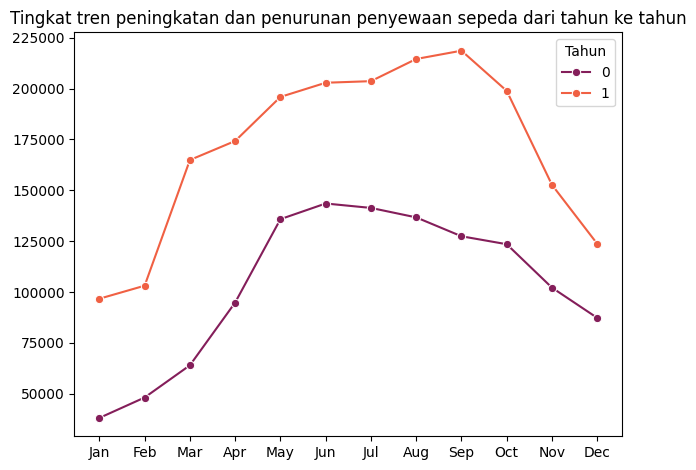

In [96]:
day['month'] = pd.Categorical(day['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Tingkat tren peningkatan dan penurunan penyewaan sepeda dari tahun ke tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()


Berdasarkan visualisasi diatas menggunakan lineplot, dapat disimpulkan bahwa tahun 2012 (yang diwakili oleh angka 1) jelas menang unggul baik dari januari sampai desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari.

### Pertanyaan 2: Apakah ada pengaruh musim tertentu dengan jumlah penyewaaan sepeda pada hari libur?

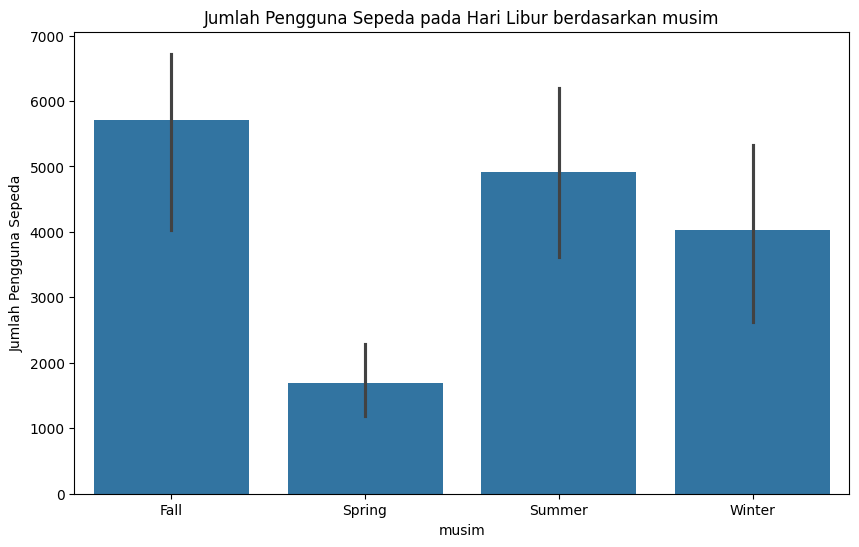

In [97]:
# Memfilter DataFrame untuk hanya menyertakan hari libur
holiday_df = day[day['holiday'] == 1]

# Membuat barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='season',
    y='count',
    data=holiday_df)

plt.title('Jumlah Pengguna Sepeda pada Hari Libur berdasarkan musim')
plt.xlabel('musim')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

berdasarkan visualisasi boxplot diatas, dpat disimpulkan bahwa musim memengaruhi memengaruhi jumlah penyewaan sepeda. Orang-orang cenderung banyak menyewa sepeda pada musim fall. sementara pada musim spring lebih sedikit.

## Bagaimana hubungan antara variabel temp, atemp, dan humidity dengan jumlah peminjaman sepeda? Apakah ada korelasi antara variabel-variabel ini dengan jumlah peminjaman?

Text(0.5, 1.0, 'Humidity vs Count')

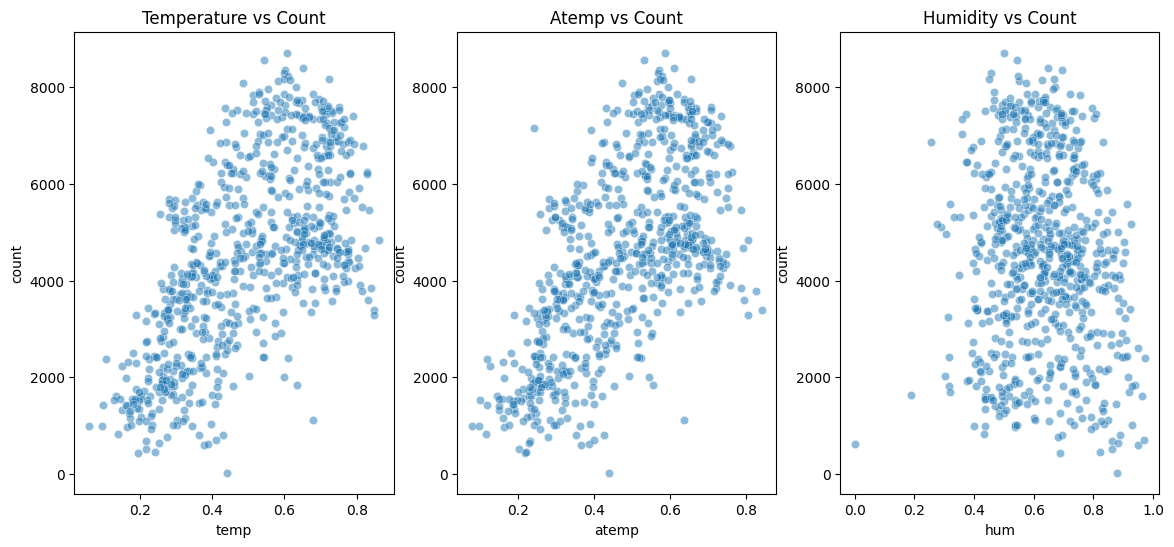

In [98]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='count',
    data=day,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    data=day,
    alpha=0.5
)
plt.title('Atemp vs Count')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='count',
    data=day,
    alpha=0.5
)
plt.title('Humidity vs Count')



Berdasarkan analisi scatter plot diatas, dapat disimpukan bahwa:
* korelasi antara temperatur dan count, menunjukkan korelasi yang positif, dapat disimpulkan bahwa jumlah penyewaan sepeda meningkat.
* korelasi antara atemp dan count juga menunjukkan korelasi positif. Disimpulkan bahwa jumlah penyewaan sepeda meningkat.
* sementara korelasi antara humidity dan count tidak menunjukkan korelasi yang yang positif. Namun cenderung sedikit negatif. Disimpulkan bahwa jumlah penyewaan sepeda menurun.



## Conclusion

- Conclution pertanyaan 1 : Berdasarkan visualisasi menggunakan lineplot, dapat disimpulkan bahwa tahun 2012 secara konsisten mengungguli tahun 2011 dalam jumlah penyewaan sepeda dari Januari hingga Desember. Puncak aktivitas penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi adalah Januari.
Di sisi lain, pada tahun 2011, puncak penyewaan sepeda terjadi pada bulan Juni, dengan bulan Januari memiliki tingkat penyewaan yang paling rendah. Ini menunjukkan pola yang berbeda dari tahun 2012, di mana puncak dan titik terendah berbeda dari tahun sebelumnya.

- Conclution pertanyaan 2 : Berdasarkan visualisasi menggunakan boxplot, terlihat bahwa musim memengaruhi jumlah penyewaan sepeda dengan jelas. Pola ini menunjukkan bahwa orang-orang cenderung lebih banyak menyewa sepeda pada musim gugur (fall), yang terlihat dari kisaran (range) yang lebih tinggi dari nilai-nilai penyewaan sepeda pada musim tersebut.
Sementara itu, pada musim semi (spring), kisaran nilai penyewaan sepeda cenderung lebih rendah, menunjukkan bahwa orang-orang menyewa sepeda dalam jumlah yang lebih sedikit pada musim ini.
Hal ini menegaskan bahwa faktor musim memiliki pengaruh signifikan terhadap pola penyewaan sepeda, dengan musim gugur menjadi periode paling populer untuk aktivitas penyewaan sepeda, sementara musim semi menunjukkan tingkat aktivitas penyewaan yang lebih rendah.

- Conclution pertanyaan 3: Berdasarkan analisis scatter plot, terlihat bahwa terdapat korelasi positif antara temperatur (temp) dan jumlah penyewaan sepeda (count), yang berarti ketika suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat.
Demikian juga, korelasi antara suhu terasa (atemp) dan jumlah penyewaan sepeda juga menunjukkan hubungan yang positif, menandakan bahwa ketika suhu terasa naik, jumlah penyewaan sepeda cenderung meningkat.
Namun, ketika melihat korelasi antara kelembaban (humidity) dan jumlah penyewaan sepeda, tidak terdapat hubungan positif yang jelas. Bahkan, terdapat kecenderungan sedikit negatif, menunjukkan bahwa ketika kelembaban naik, jumlah penyewaan sepeda cenderung sedikit menurun.
Jadi, kesimpulannya adalah suhu dan suhu terasa memiliki pengaruh positif terhadap jumlah penyewaan sepeda, sementara kelembaban memiliki pengaruh yang lebih kompleks dan cenderung menurunkan jumlah penyewaan sepeda

In [127]:
day.to_csv("all_data.csv", index=False)